<a href="https://colab.research.google.com/github/SakshamTripathi1996/Appliances-energy/blob/main/Copy_of_Copy_of_Copy_of_appliances_min_max_scaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option("display.max_columns",50)  #setting the view to show all columns

In [2]:
#Getting data
data= pd.read_csv("/content/drive/MyDrive/Copy of data_application_energy.csv")


In [3]:
#getting first 5 rows
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
#Getting no. of rows and coulumns
data.shape

(19735, 29)

In [5]:
#getting info od dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
#checking description
data.describe()
 

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
#checking null values
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

No null values in our dataset

In [8]:
#getting columns
data.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [9]:
#checking duplicates
duplicates=data[data.duplicated()]
duplicates

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2


In [10]:
#changing data to appropriate dtype
data['date'] = data['date'].apply(pd.to_datetime)

In [11]:
#extraxting hour minuters from date column
data['month'] = data.date.dt.month      
data['weekday'] = data.date.dt.weekday  
data['hour'] = data.date.dt.hour         
data['week'] = data.date.dt.week 
data['minutes'] = data.date.dt.minute 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


No duplicates rows in our dataset

In [12]:
#dropping columns ie "lights"
data.drop(["lights","date","rv2"],axis=1,inplace=True)

# EDA

## checking for outliers

In [13]:
data.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'month', 'weekday', 'hour', 'week', 'minutes'],
      dtype='object')

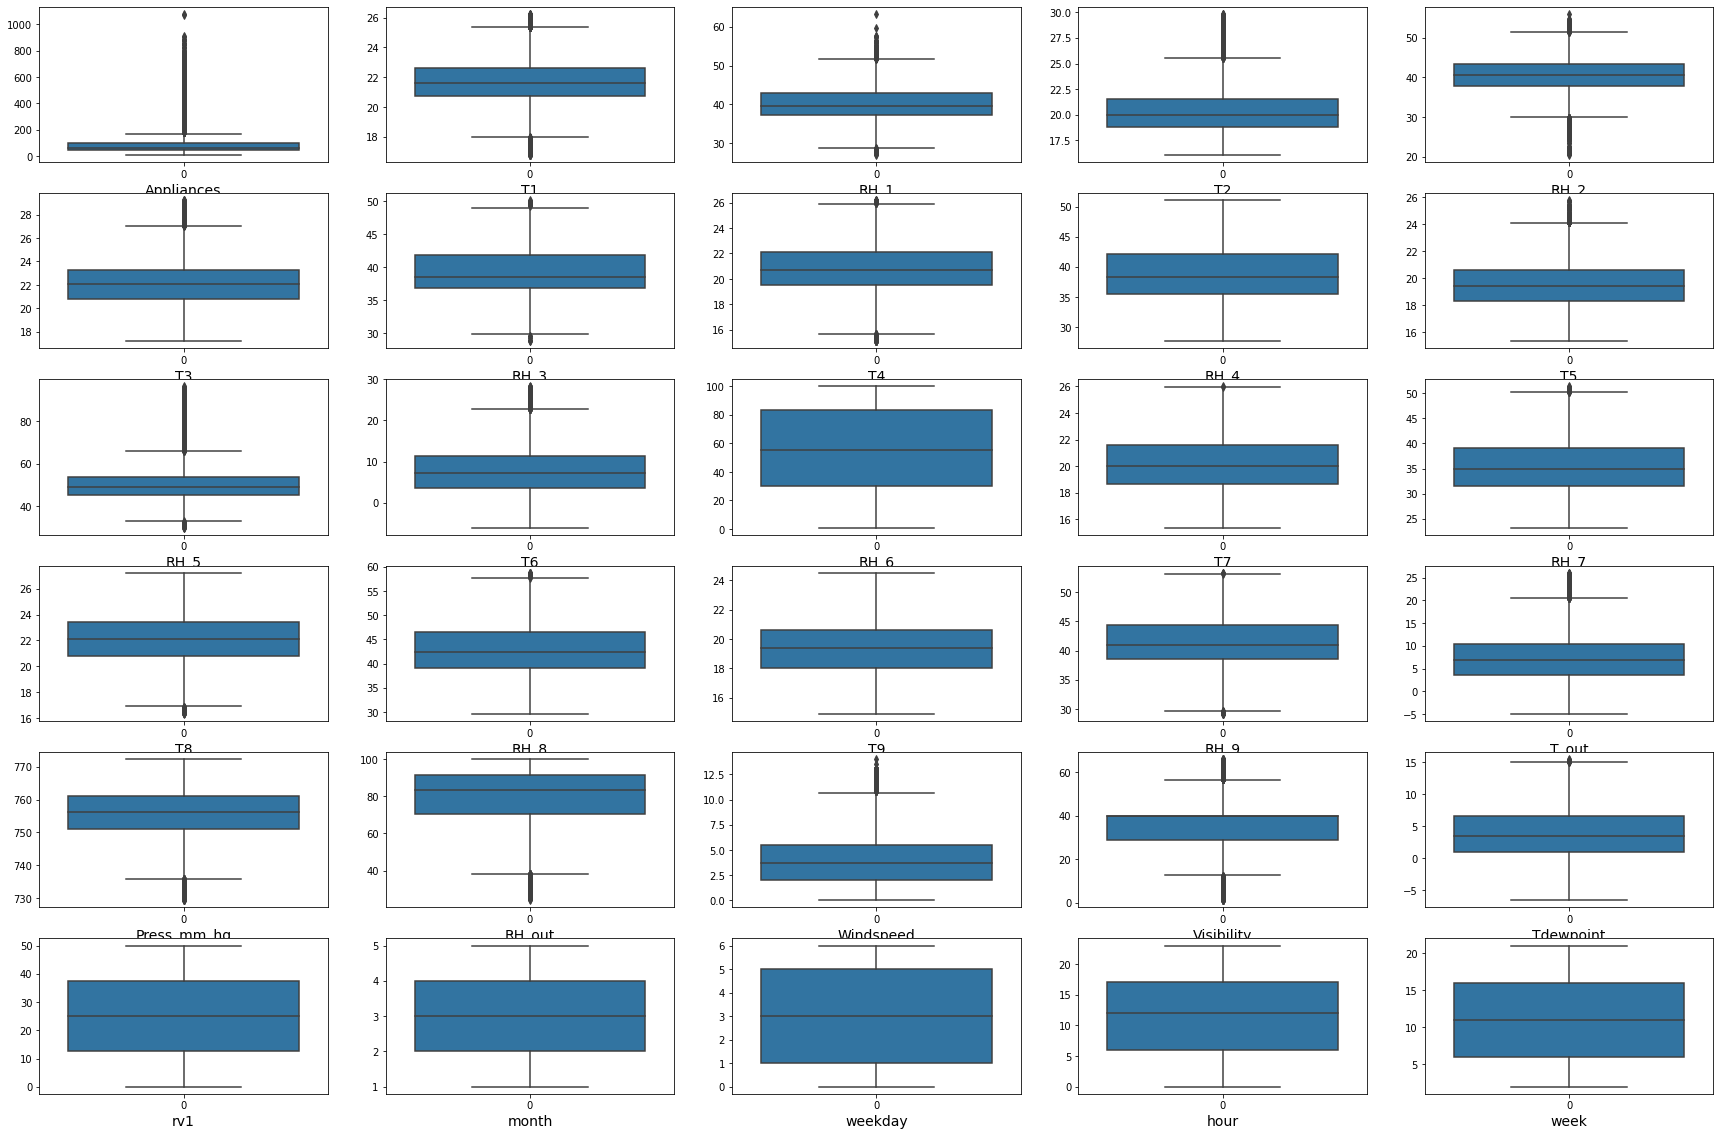

In [14]:
plt.figure(figsize=(30,20))
graph=1

for column in data:
    if graph<=30:
        ax=plt.subplot(6,5,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=14)
    graph+=1
plt.show()

In [15]:
data.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'month', 'weekday', 'hour', 'week', 'minutes'],
      dtype='object')

In [16]:
#applying IQR on RH_1
q1=np.percentile(data["RH_1"],25)
print("q1 =",q1)
q2=np.percentile(data["RH_1"],50)
print("q2 =",q2)
q3=np.percentile(data["RH_1"],75)
print("q3 =",q3)

iq_range=q3-q1

upper=q2+1.5*iq_range
lower=q1-1.5*iq_range

data=data[(data["RH_1"]<=upper)]


q1 = 37.33333333333329
q2 = 39.6566666666667
q3 = 43.0666666666667


In [17]:
#applying IQR on T2
q1=np.percentile(data["T2"],25)
print("q1 =",q1)
q2=np.percentile(data["T2"],50)
print("q2 =",q2)
q3=np.percentile(data["T2"],75)
print("q3 =",q3)

iq_range=q3-q1

upper=q2+1.5*iq_range
lower=q1-1.5*iq_range

data=data[(data["T2"]<=upper)]

q1 = 18.79
q2 = 19.89
q3 = 21.343571428571448


In [18]:
#applying IQR on RH_2
q1=np.percentile(data["RH_2"],25)
print("q1 =",q1)
q2=np.percentile(data["RH_2"],50)
print("q2 =",q2)
q3=np.percentile(data["RH_2"],75)
print("q3 =",q3)

iq_range=q3-q1

upper=q2+1.5*iq_range
lower=q1-1.5*iq_range

data=data[(data["RH_2"]<=upper)]

q1 = 38.19702380952384
q2 = 40.53
q3 = 43.1266666666667


In [19]:
#applying IQR on T3
q1=np.percentile(data["T3"],25)
print("q1 =",q1)
q2=np.percentile(data["T3"],50)
print("q2 =",q2)
q3=np.percentile(data["T3"],75)
print("q3 =",q3)

iq_range=q3-q1

upper=q2+1.5*iq_range
lower=q1-1.5*iq_range

data=data[(data["T3"]<=upper)]

q1 = 20.6
q2 = 21.865
q3 = 23.0


In [20]:
#applying IQR on RH_3
q1=np.percentile(data["RH_3"],25)
print("q1 =",q1)
q2=np.percentile(data["RH_3"],50)
print("q2 =",q2)
q3=np.percentile(data["RH_3"],75)
print("q3 =",q3)

iq_range=q3-q1

upper=q2+1.5*iq_range
lower=q1-1.5*iq_range

data=data[(data["RH_3"]<=upper)]

q1 = 36.79
q2 = 38.4
q3 = 41.09


In [21]:
#applying IQR on T4
q1=np.percentile(data["T4"],25)
print("q1 =",q1)
q2=np.percentile(data["T4"],50)
print("q2 =",q2)
q3=np.percentile(data["T4"],75)
print("q3 =",q3)

iq_range=q3-q1

upper=q2+1.5*iq_range
lower=q1-1.5*iq_range

data=data[(data["T4"]<=upper)]

q1 = 19.39
q2 = 20.4266666666667
q3 = 21.5


In [22]:
#applying IQR on T5
q1=np.percentile(data["T5"],25)
print("q1 =",q1)
q2=np.percentile(data["T5"],50)
print("q2 =",q2)
q3=np.percentile(data["T5"],75)
print("q3 =",q3)

iq_range=q3-q1

upper=q2+1.5*iq_range
lower=q1-1.5*iq_range

data=data[(data["T5"]<=upper)]

q1 = 18.1
q2 = 19.1
q3 = 20.1


In [23]:
#applying IQR on RH_5
q1=np.percentile(data["RH_5"],25)
print("q1 =",q1)
q2=np.percentile(data["RH_5"],50)
print("q2 =",q2)
q3=np.percentile(data["RH_5"],75)
print("q3 =",q3)

iq_range=q3-q1

upper=q2+1.5*iq_range
lower=q1-1.5*iq_range

data=data[(data["RH_5"]<=upper)]

q1 = 45.2966666666667
q2 = 48.4666666666667
q3 = 53.01716666666665


In [24]:
#applying IQR on T6
q1=np.percentile(data["T6"],25)
print("q1 =",q1)
q2=np.percentile(data["T6"],50)
print("q2 =",q2)
q3=np.percentile(data["T6"],75)
print("q3 =",q3)

iq_range=q3-q1

upper=q2+1.5*iq_range
lower=q1-1.5*iq_range

data=data[(data["T6"]<=upper)]

q1 = 2.93333333333333
q2 = 6.093333333333329
q3 = 9.4


In [25]:
#applying IQR on T_out
q1=np.percentile(data["T_out"],25)
print("q1 =",q1)
q2=np.percentile(data["T_out"],50)
print("q2 =",q2)
q3=np.percentile(data["T_out"],75)
print("q3 =",q3)

iq_range=q3-q1

upper=q2+1.5*iq_range
lower=q1-1.5*iq_range

data=data[(data["T_out"]<=upper)]

q1 = 2.925
q2 = 5.65
q3 = 8.53333333333333


In [26]:
#applying IQR on Press_mm_hg
q1=np.percentile(data["Press_mm_hg"],25)
print("q1 =",q1)
q2=np.percentile(data["Press_mm_hg"],50)
print("q2 =",q2)
q3=np.percentile(data["Press_mm_hg"],75)
print("q3 =",q3)

iq_range=q3-q1

upper=q2+1.5*iq_range
lower=q1-1.5*iq_range

data=data[(data["Press_mm_hg"]<=upper)]

q1 = 751.233333333333
q2 = 756.4
q3 = 762.2


In [27]:
#applying IQR on RH_out
q1=np.percentile(data["RH_out"],25)
print("q1 =",q1)
q2=np.percentile(data["RH_out"],50)
print("q2 =",q2)
q3=np.percentile(data["RH_out"],75)
print("q3 =",q3)

iq_range=q3-q1

upper=q2+1.5*iq_range
lower=q1-1.5*iq_range

data=data[(data["RH_out"]<=upper)]

q1 = 73.5
q2 = 85.0
q3 = 92.0


In [28]:
#applying IQR on Windspeed
q1=np.percentile(data["Windspeed"],25)
print("q1 =",q1)
q2=np.percentile(data["Windspeed"],50)
print("q2 =",q2)
q3=np.percentile(data["Windspeed"],75)
print("q3 =",q3)

iq_range=q3-q1

upper=q2+1.5*iq_range
lower=q1-1.5*iq_range

data=data[(data["Windspeed"]<=upper)]

q1 = 2.0
q2 = 3.5
q3 = 5.5


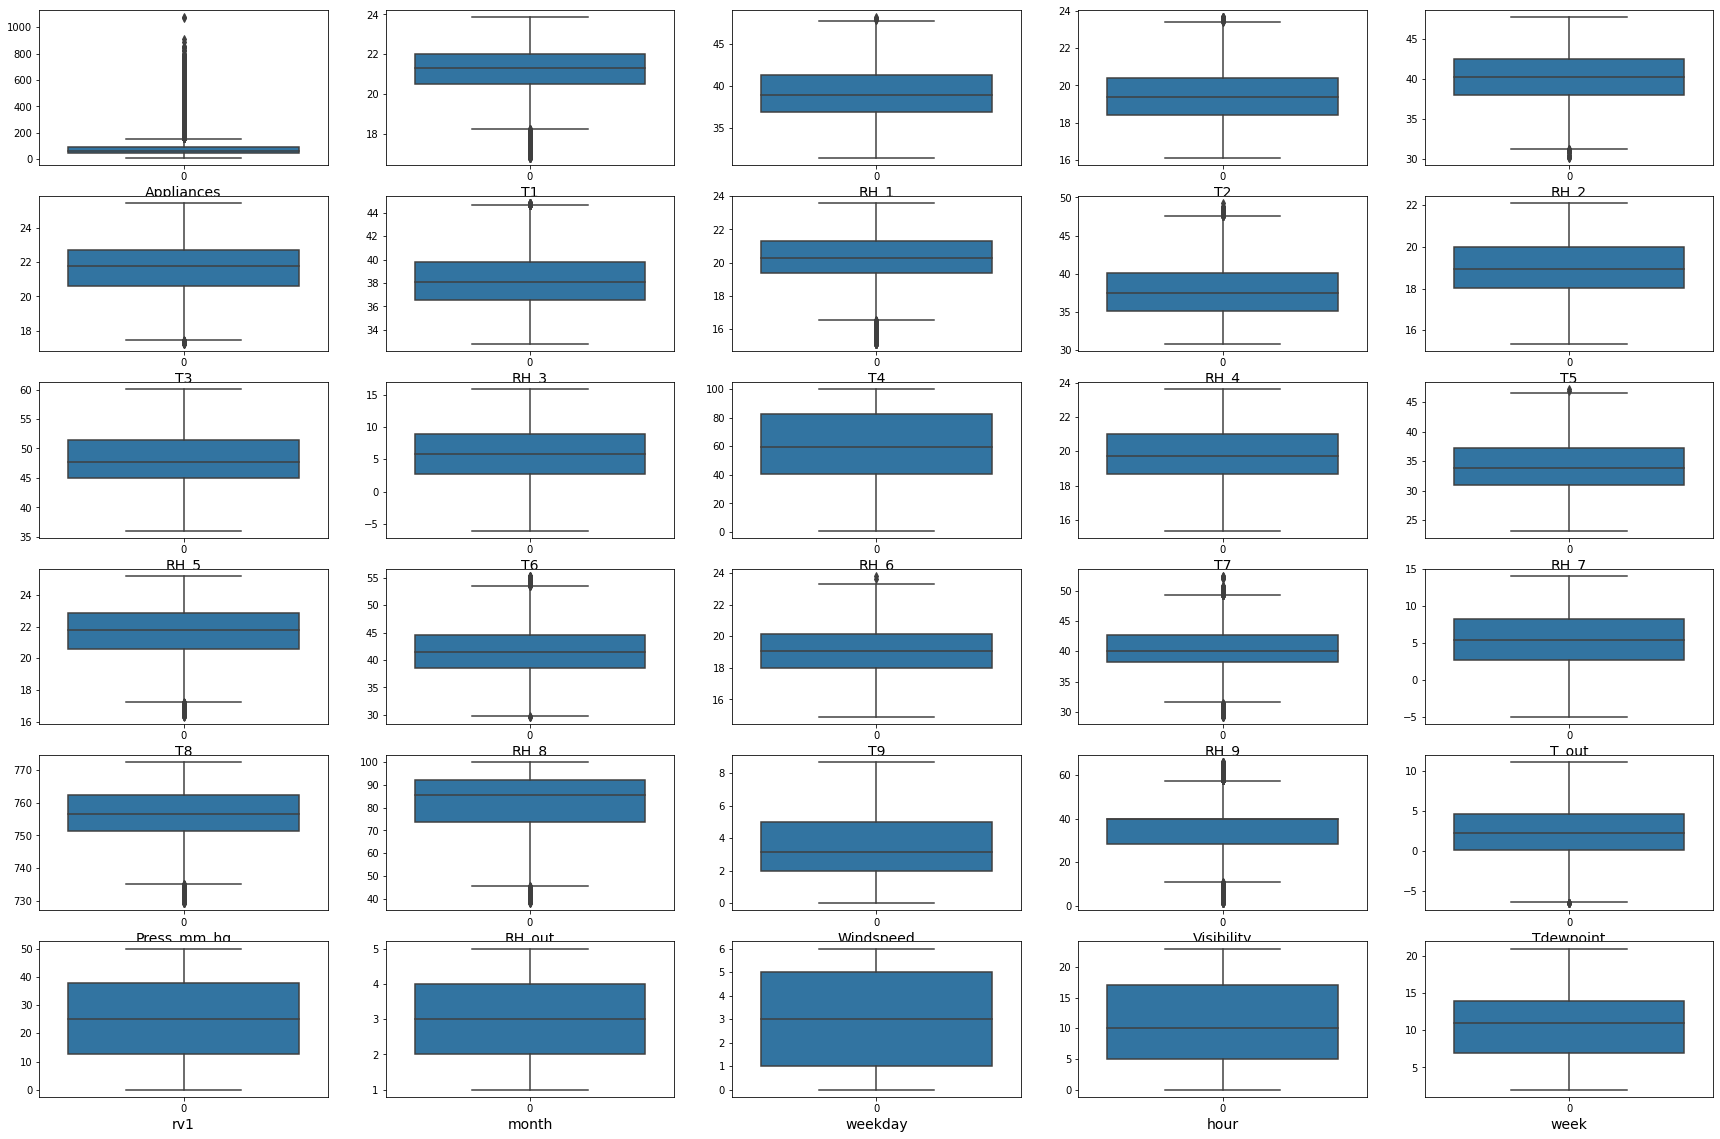

In [29]:
plt.figure(figsize=(30,20))
graph=1

for column in data:
    if graph<=30:
        ax=plt.subplot(6,5,graph)
        sns.boxplot(data = data[column],orient="v")
        plt.xlabel(column,fontsize=14)
    graph+=1
plt.show()

In [30]:
data.shape

(12543, 31)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


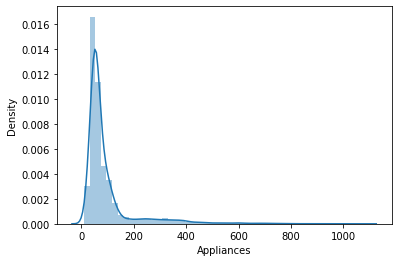

In [31]:
#checking distribution of target variable
sns.distplot(data["Appliances"])

In [32]:
data.head()

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,month,weekday,hour,week,minutes
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.200000,48.900000,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,1,0,17,2,0
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,1,0,17,2,10
8,60,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.100000,48.590000,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,1,0,18,2,20
11,580,20.066667,46.396667,19.426667,44.400000,19.790000,44.826667,19.000000,46.430000,17.100000,55.000000,6.123333,87.993333,17.530000,44.263333,18.066667,48.633333,16.890000,45.29,5.983333,734.433333,91.166667,5.833333,40.000000,4.616667,8.827838,1,0,18,2,50
107,60,19.890000,47.160000,19.033333,44.566667,19.926667,44.790000,20.066667,44.860000,18.100000,49.566667,5.400000,96.293333,17.700000,41.260000,18.500000,49.090000,17.033333,45.23,6.216667,743.216667,86.833333,5.000000,38.166667,4.150000,23.905902,1,1,10,2,50


In [33]:
#finding correlation
#data.corr()
data.corr()['Appliances'].sort_values(ascending=False)

Appliances     1.000000
hour           0.219571
T2             0.126901
Windspeed      0.121136
T6             0.112125
T_out          0.089368
RH_1           0.083478
T3             0.032025
RH_3           0.028691
T1             0.019777
T8             0.013529
Visibility     0.010760
minutes        0.008100
T4             0.005007
RH_4          -0.000929
weekday       -0.005403
rv1           -0.005827
T7            -0.007248
Tdewpoint     -0.021505
T9            -0.030987
Press_mm_hg   -0.034797
T5            -0.048128
RH_6          -0.048734
RH_5          -0.054570
month         -0.065802
week          -0.066222
RH_9          -0.067089
RH_2          -0.090954
RH_7          -0.094894
RH_8          -0.138202
RH_out        -0.164967
Name: Appliances, dtype: float64

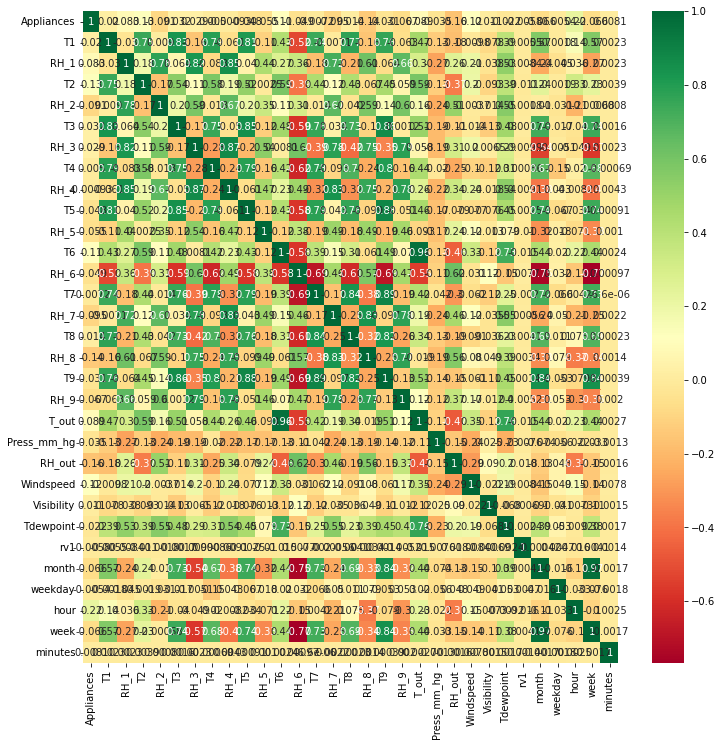

In [34]:
corrmat=data.corr()
top=corrmat.index
plt.figure(figsize=(12,12))
a=sns.heatmap(data[top].corr(),annot=True,cmap="RdYlGn")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

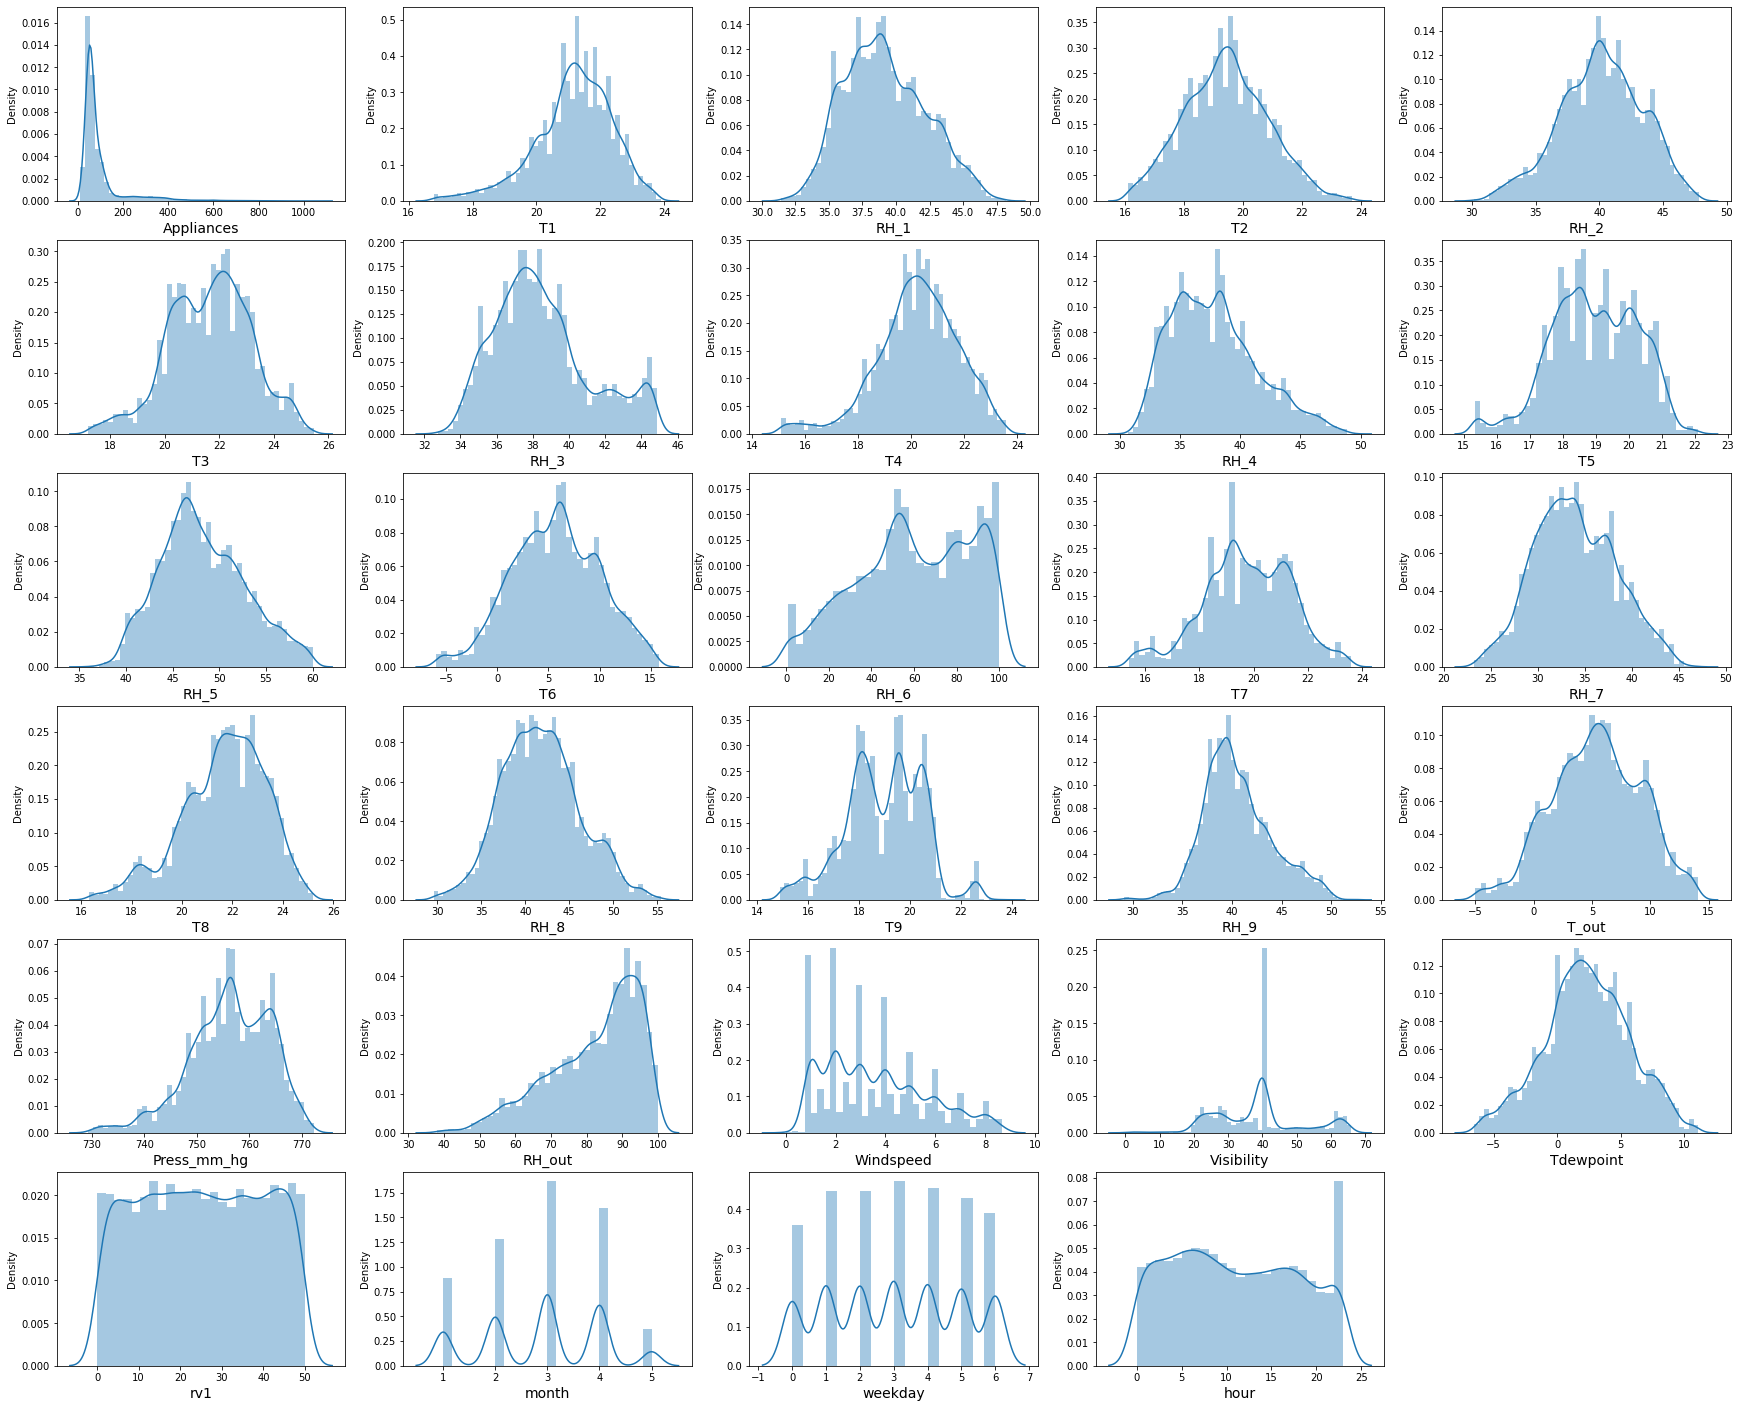

In [35]:
plt.figure(figsize=(30,25))
plotnumber = 1

for column in data:
    if plotnumber < 30:
        ax = plt.subplot(6,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
    plotnumber +=1
plt.show()




In [36]:
import warnings
warnings.filterwarnings("ignore")

Log Transformation

In [37]:
#log transformation
independent_variables = list(set(data.describe().columns)-{"Appliances"})
independent_variables

['RH_7',
 'minutes',
 'week',
 'T8',
 'RH_8',
 'weekday',
 'RH_5',
 'RH_4',
 'T3',
 'RH_6',
 'month',
 'T5',
 'T2',
 'T4',
 'T6',
 'RH_3',
 'T_out',
 'RH_9',
 'T7',
 'RH_out',
 'RH_2',
 'hour',
 'T1',
 'rv1',
 'Tdewpoint',
 'Visibility',
 'Windspeed',
 'RH_1',
 'Press_mm_hg',
 'T9']

In [58]:
a_log=np.log10(data["T9"])
a_log.skew()

-0.4268209925962091

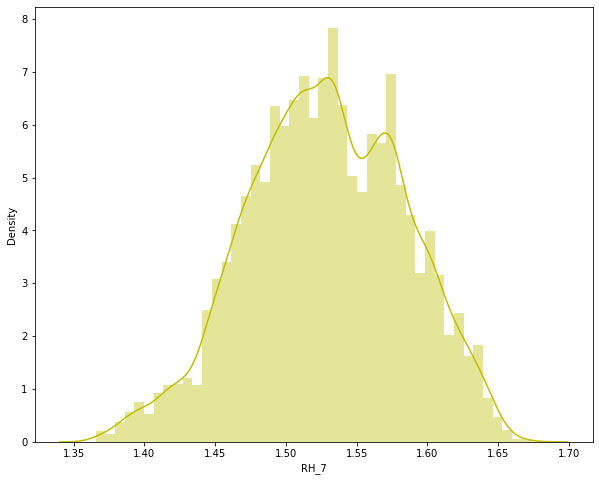

In [62]:
plt.figure(figsize=(10,8))
sns.distplot(np.log10(data["RH_7"]),color="y")

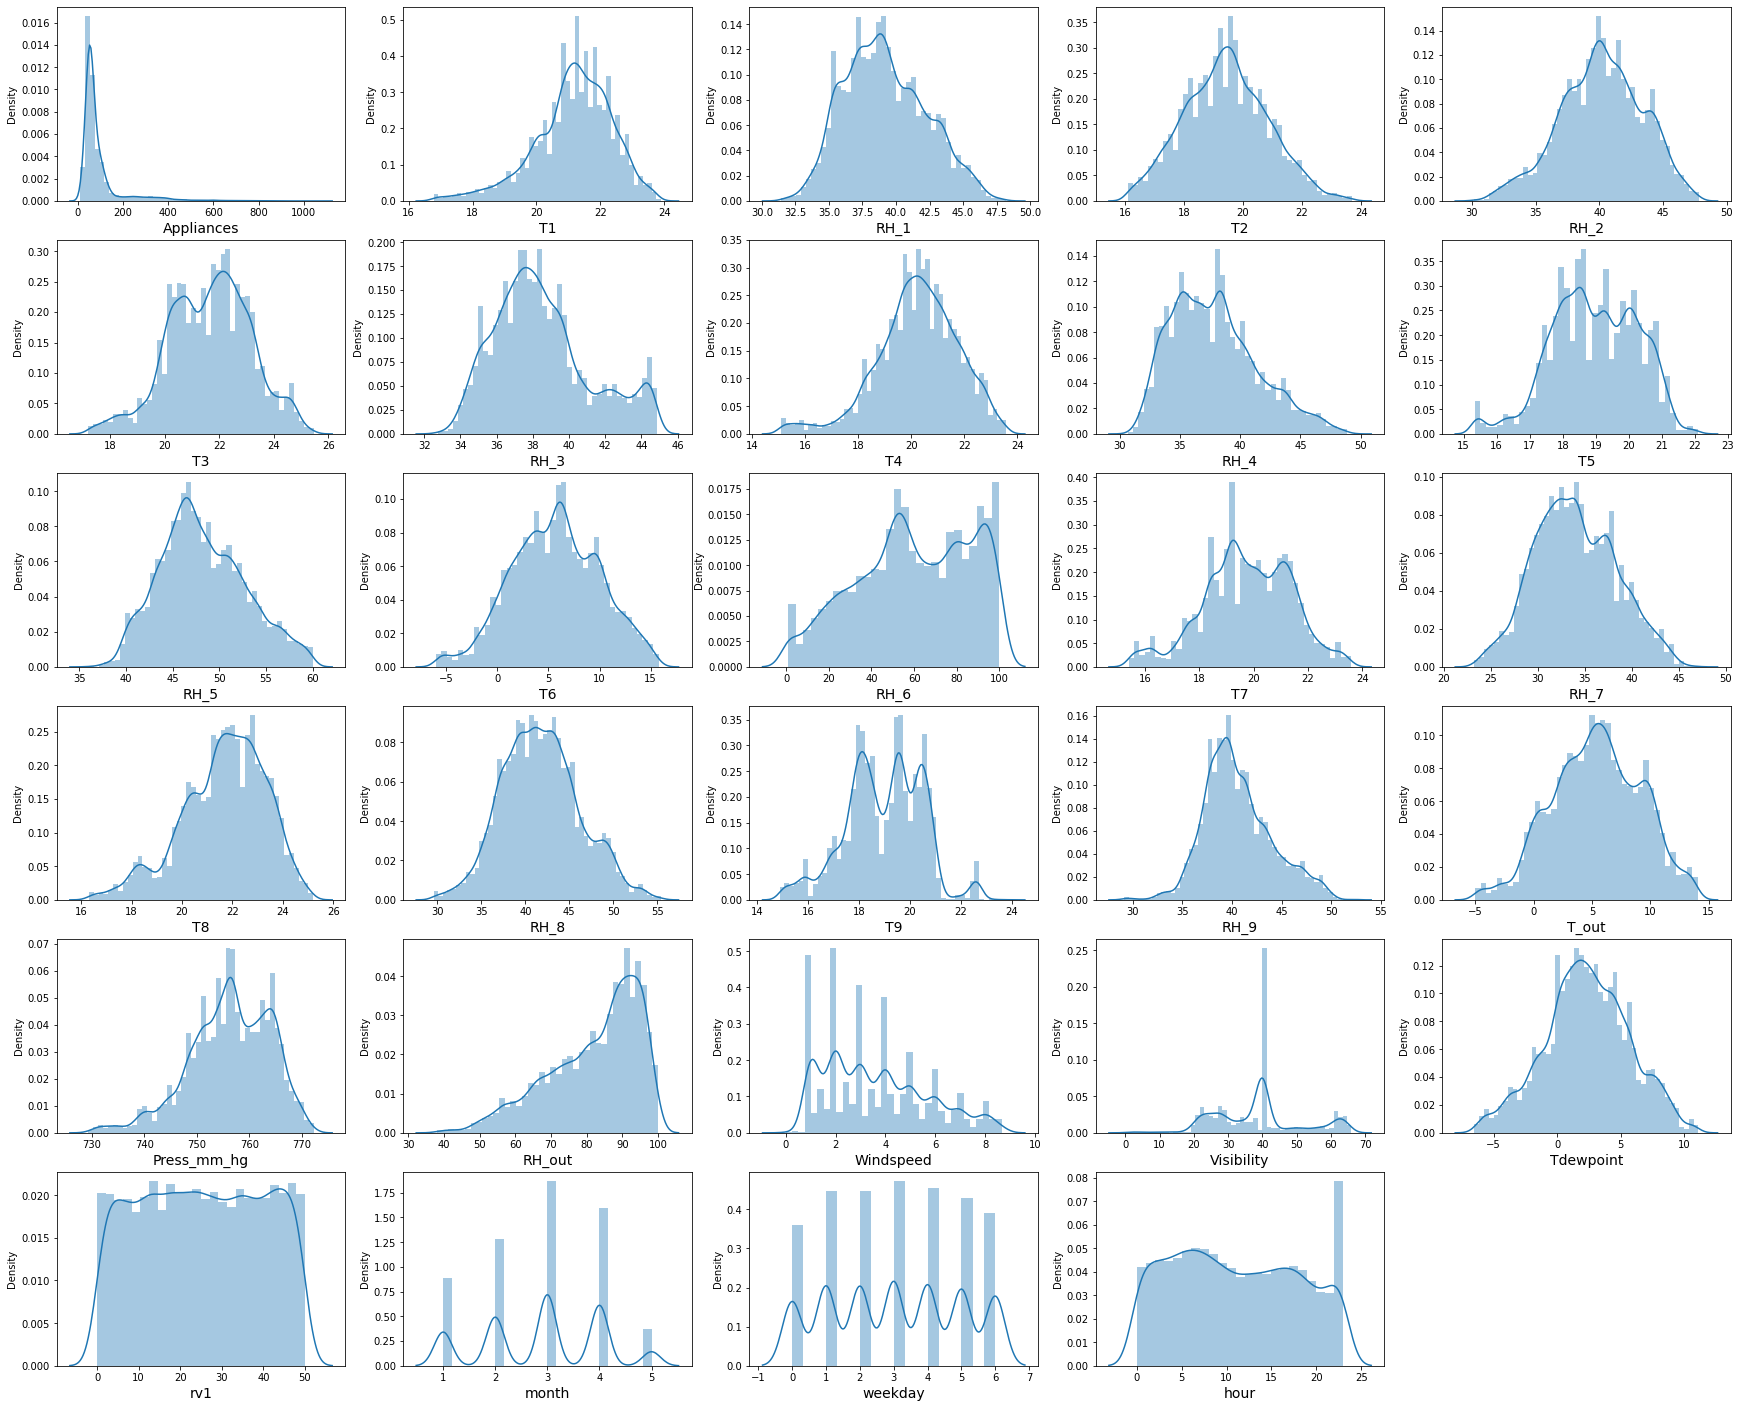

In [50]:
plt.figure(figsize=(30,25))
plotnumber = 1

for column in data:
    if plotnumber < 30:
        ax = plt.subplot(6,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=14)
    plotnumber +=1
plt.show()

In [39]:
data.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'month', 'weekday', 'hour', 'week', 'minutes'],
      dtype='object')

In [40]:
x = data.drop(["Appliances"],axis=1)
y = data['Appliances']

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.22, random_state=42)

In [42]:
#scaling the data using MIn max Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred)*100)

14.20280859056482


In [44]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
las = Lasso()
las.fit(x_train,y_train)
pred = las.predict(x_test)
# finding the mean squared error and variance
mse = mean_squared_error(y_test, pred)
print("RMSE :", np.sqrt(((y_test - pred)**2).sum()/len(y_test)))
print('Accuracy: %.2f' % r2_score(y_test, pred))

RMSE : 90.92893499481636
Accuracy: 0.07


In [45]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
las = Lasso()
las.fit(x_train,y_train)
pred = las.predict(x_test)
# finding the mean squared error and variance
mse = mean_squared_error(y_test, pred)
print("RMSE :", np.sqrt(((y_test - pred)**2).sum()/len(y_test)))
print(r2_score(y_test,pred)*100)

RMSE : 90.92893499481636
7.107971594094298


In [46]:
from xgboost import XGBRegressor
xgbt = XGBRegressor()
xgbt.fit(x_train,y_train)
# predicting the  test set results
y_pred = xgbt.predict(x_test)
# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print(r2_score(y_test,y_pred)*100)

[10:04:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE : 77.73691582408352
32.10639805251616


In [47]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
# predicting the  test set results
y_pred = rf.predict(x_test)
# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print(r2_score(y_test,y_pred)*100)

RMSE : 61.840578992639834
57.034355416847546


In [48]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor()
lgbm.fit(x_train,y_train)
# predicting the  test set results
y_pred = lgbm.predict(x_test)
# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(((y_test - y_pred)**2).sum()/len(y_test)))
print(r2_score(y_test,y_pred)*100)

RMSE : 67.30115151559079
49.11154947638151
